In [2]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importing the dataset
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Getting an idea about NULL values
df.isnull().sum().any()

np.False_

In [ ]:
# np.False_ means that there are no NULL values in the dataset.

In [6]:
# Getting an idea about the duplicates
df.duplicated().sum()

np.int64(1)

In [ ]:
# np.int64(1) means that there is 1 duplicate row in the dataset.

In [7]:
# Dropping the duplicate rows in the dataset
df = df.drop_duplicates()

In [8]:
# Getting an idea about the duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
# np.int64(0) means that there are no duplicate row in the dataset.

In [9]:
# Seperating training and testing data
X = df.drop('charges', axis=1)
y = df['charges']

In [10]:
# Getting data types
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 73.1+ KB


In [11]:
# Seperating numerical and categorical columns
categorical = ['sex', 'smoker', 'region']
numerical = ['age', 'bmi', 'children']

In [13]:
# Creating a preprocessor
from sklearn.preprocessing import OneHotEncoder
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(drop = "first"), categorical)
])

In [14]:
# Performing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Applying the preprocessor
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [16]:
# Baseline ANN Model
model_base = Sequential([
    Dense(8, input_dim = X_train.shape[1], activation = 'relu'),
    Dense(1)
])

In [19]:
# Compiling the model
model_base.compile(loss = 'mse', metrics = ['r2_score'])

In [20]:
# Fitting the model
history_base = model_base.fit(X_train, y_train,
                              epochs = 100, verbose = 1,
                              validation_data = (X_test, y_test))

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 305040128.0000 - r2_score: -1.2278 - val_loss: 387449984.0000 - val_r2_score: -1.1085
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 322124928.0000 - r2_score: -1.2249 - val_loss: 387443840.0000 - val_r2_score: -1.1085
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 319150464.0000 - r2_score: -1.3149 - val_loss: 387437600.0000 - val_r2_score: -1.1084
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 289528800.0000 - r2_score: -1.2501 - val_loss: 387431168.0000 - val_r2_score: -1.1084
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 318127520.0000 - r2_score: -1.2284 - val_loss: 387424352.0000 - val_r2_score: -1.1084
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 293747136.0000 - r2_score: -1.1767 - val_loss: 387416896.0000 - val_r2_score: -1.1083
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 305467744.0000 - r2_score: -1.1925 - val_loss: 387408224.0000 - val_r2_

In [22]:
# Evaluating the model on training data
loss_base, r2_base = model_base.evaluate(X_train, y_train)
print(f"Training Loss: {loss_base}, Training R2 Score: {r2_base}")

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 303902112.0000 - r2_score: -1.1768 
Training Loss: 300936608.0, Training R2 Score: -1.1979870796203613


In [24]:
# Evaluating the model on training data
loss_base, r2_base = model_base.evaluate(X_test, y_test)
print(f"Testing Loss: {loss_base}, Testing R2 Score: {r2_base}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 389253952.0000 - r2_score: -1.0480 
Testing Loss: 380750560.0, Testing R2 Score: -1.0720434188842773


In [ ]:
'''
Comments ->
We are getting negative r2 score on both
training and testing data and it is not acceptable.
'''

In [25]:
# Optimized ANN Model
from tensorflow.keras.layers import Dropout
model_opt = Sequential([
    Dense(128, input_dim = X_train.shape[1], activation = 'relu'),
    Dropout(0.5),
    Dense(64, activation = 'relu'),
    Dropout(0.5),
    Dense(32, activation = 'relu'),
    Dropout(0.5),
    Dense(1)
])

In [26]:
# Compiling the model
model_opt.compile(loss = 'mse', metrics = ['r2_score'])

In [27]:
# EarlyStopping
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5)

In [28]:
# Fitting the data
history_opt = model_opt.fit(X_train, y_train,
                            epochs = 100, verbose = 1,
                            validation_data = (X_test, y_test),
                            callbacks = [early_stopping])

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 290894592.0000 - r2_score: -1.2466 - val_loss: 387243040.0000 - val_r2_score: -1.1074
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 293612960.0000 - r2_score: -1.2913 - val_loss: 386339072.0000 - val_r2_score: -1.1025
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 274964736.0000 - r2_score: -1.2963 - val_loss: 383705568.0000 - val_r2_score: -1.0881
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 305336448.0000 - r2_score: -1.2215 - val_loss: 378263168.0000 - val_r2_score: -1.0585
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 302783776.0000 - r2_score: -1.1287 - val_loss: 368653952.0000 - val_r2_score: -1.0062
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 292072096.0000 - r2_score: -1.1472 - val_loss: 353192512.0000 - val_r2_score: -0.9221
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 277972576.0000 - r2_score: -1.0376 - val_loss: 330783680.0000 - val_r2_

In [29]:
# Model Evaluation
loss_opt, r2_opt = model_opt.evaluate(X_train, y_train)
print(f"Training Loss: {loss_opt}, Training R2 Score: {r2_opt}")

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 39406932.0000 - r2_score: 0.7171 
Training Loss: 36704936.0, Training R2 Score: 0.7319137454032898


In [30]:
# Model Evaluation
loss_opt, r2_opt = model_opt.evaluate(X_test, y_test)
print(f"Testing Loss: {loss_opt}, Testing R2 Score: {r2_opt}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 42951604.0000 - r2_score: 0.7746 
Testing Loss: 39084820.0, Testing R2 Score: 0.7873005270957947


In [ ]:
# Try to create the model without EarlyStopping. and higher epochs.

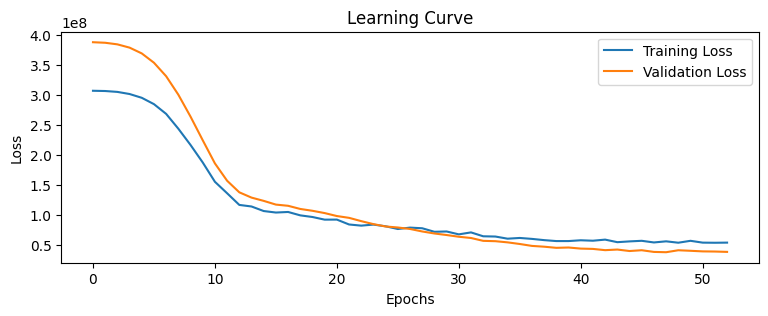

In [32]:
# Learning Curve
plt.figure(figsize = (9, 3))
plt.plot(history_opt.history['loss'], label = 'Training Loss')
plt.plot(history_opt.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()

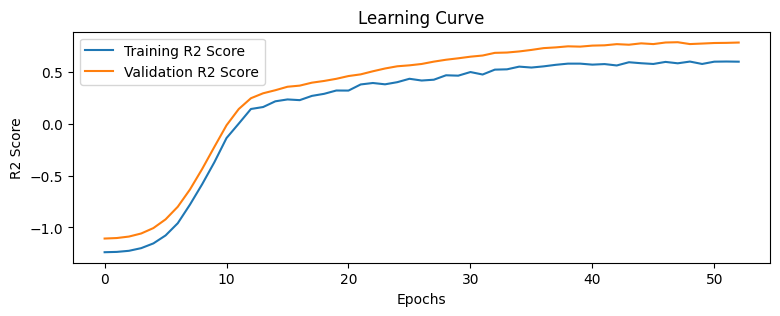

In [33]:
# Learning Curves (R2 Score Plot)
plt.figure(figsize = (9, 3))
plt.plot(history_opt.history['r2_score'], label = 'Training R2 Score')
plt.plot(history_opt.history['val_r2_score'], label = 'Validation R2 Score')
plt.xlabel('Epochs')
plt.ylabel('R2 Score')
plt.title('Learning Curve')
plt.legend()
plt.show()